The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [33]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

In [34]:
df = pd.read_csv("data/nobel.csv")

In [35]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


What is the most commonly awarded gender and birth country?



In [36]:
#top gender
top_gender = df["sex"].value_counts().idxmax()
top_gender_values = df["sex"].value_counts().max()
print("Top gender is", top_gender, "With", top_gender_values, "Awards")
#print("With", top_gender_values, "Awards")


Top gender is Male With 905 Awards


In [37]:
#top country
top_country = df["birth_country"].value_counts().idxmax()
top_country_value = df["birth_country"].value_counts().max()
print("Top country is", top_country, "With ", top_country_value, "Awards")
#print("With ", top_country_value, "Awards")


Top country is United States of America With  291 Awards


In [38]:
# Create a decade column
df["decade"] = (np.floor(df["year"] / 10) * 10).astype(int)
# Count total winners per decade
highest_award = df.groupby("decade").size().idxmax()
total_num_awards = df.groupby("decade").size().max()
print(highest_award, "boost the highest awards given, with", total_num_awards, "awards.")




2000 boost the highest awards given, with 123 awards.


The decade with the highest ratio of US-born Nobel Prize winners

In [39]:
#Create the US-born winners column
df["US_born"] = df["birth_country"]== "USA"
# Count total winners per decade
total_winners_per_decade = df.groupby("decade")["full_name"].count()

# Count US-born winners per decade
us_winners_per_decade = df[df["birth_country"] == "USA"].groupby("decade")["full_name"].count()

# Calculate the ratio of US-born winners to total winners per decade
ratio_per_decade = us_winners_per_decade / total_winners_per_decade

# Find the decade with the highest ratio
max_decade_usa = ratio_per_decade.idxmax()
highest_ratio_value = ratio_per_decade.max()

print(f"The decade with the highest ratio of US-born Nobel Prize winners to total winners is: {max_decade_usa}")
print(f"Highest ratio: {highest_ratio_value:.2f}")

The decade with the highest ratio of US-born Nobel Prize winners to total winners is: 2010
Highest ratio: 0.01


Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [40]:
# Add a column where the value is True when sex is "Female"
df["female_winner"] = df["sex"] == "Female"

# Group by decade and category, then calculate the mean of female winners
female_winners_mean = df.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

# Find the row with the highest mean
max_mean_row = female_winners_mean.loc[female_winners_mean["female_winner"].idxmax()]

# Extract the decade and category values
max_female_dict = {max_mean_row["decade"]: max_mean_row["category"]}

print("The decade and Nobel Prize category combination with the highest proportion of female laureates is:")
print(max_female_dict)


The decade and Nobel Prize category combination with the highest proportion of female laureates is:
{2020: 'Literature'}


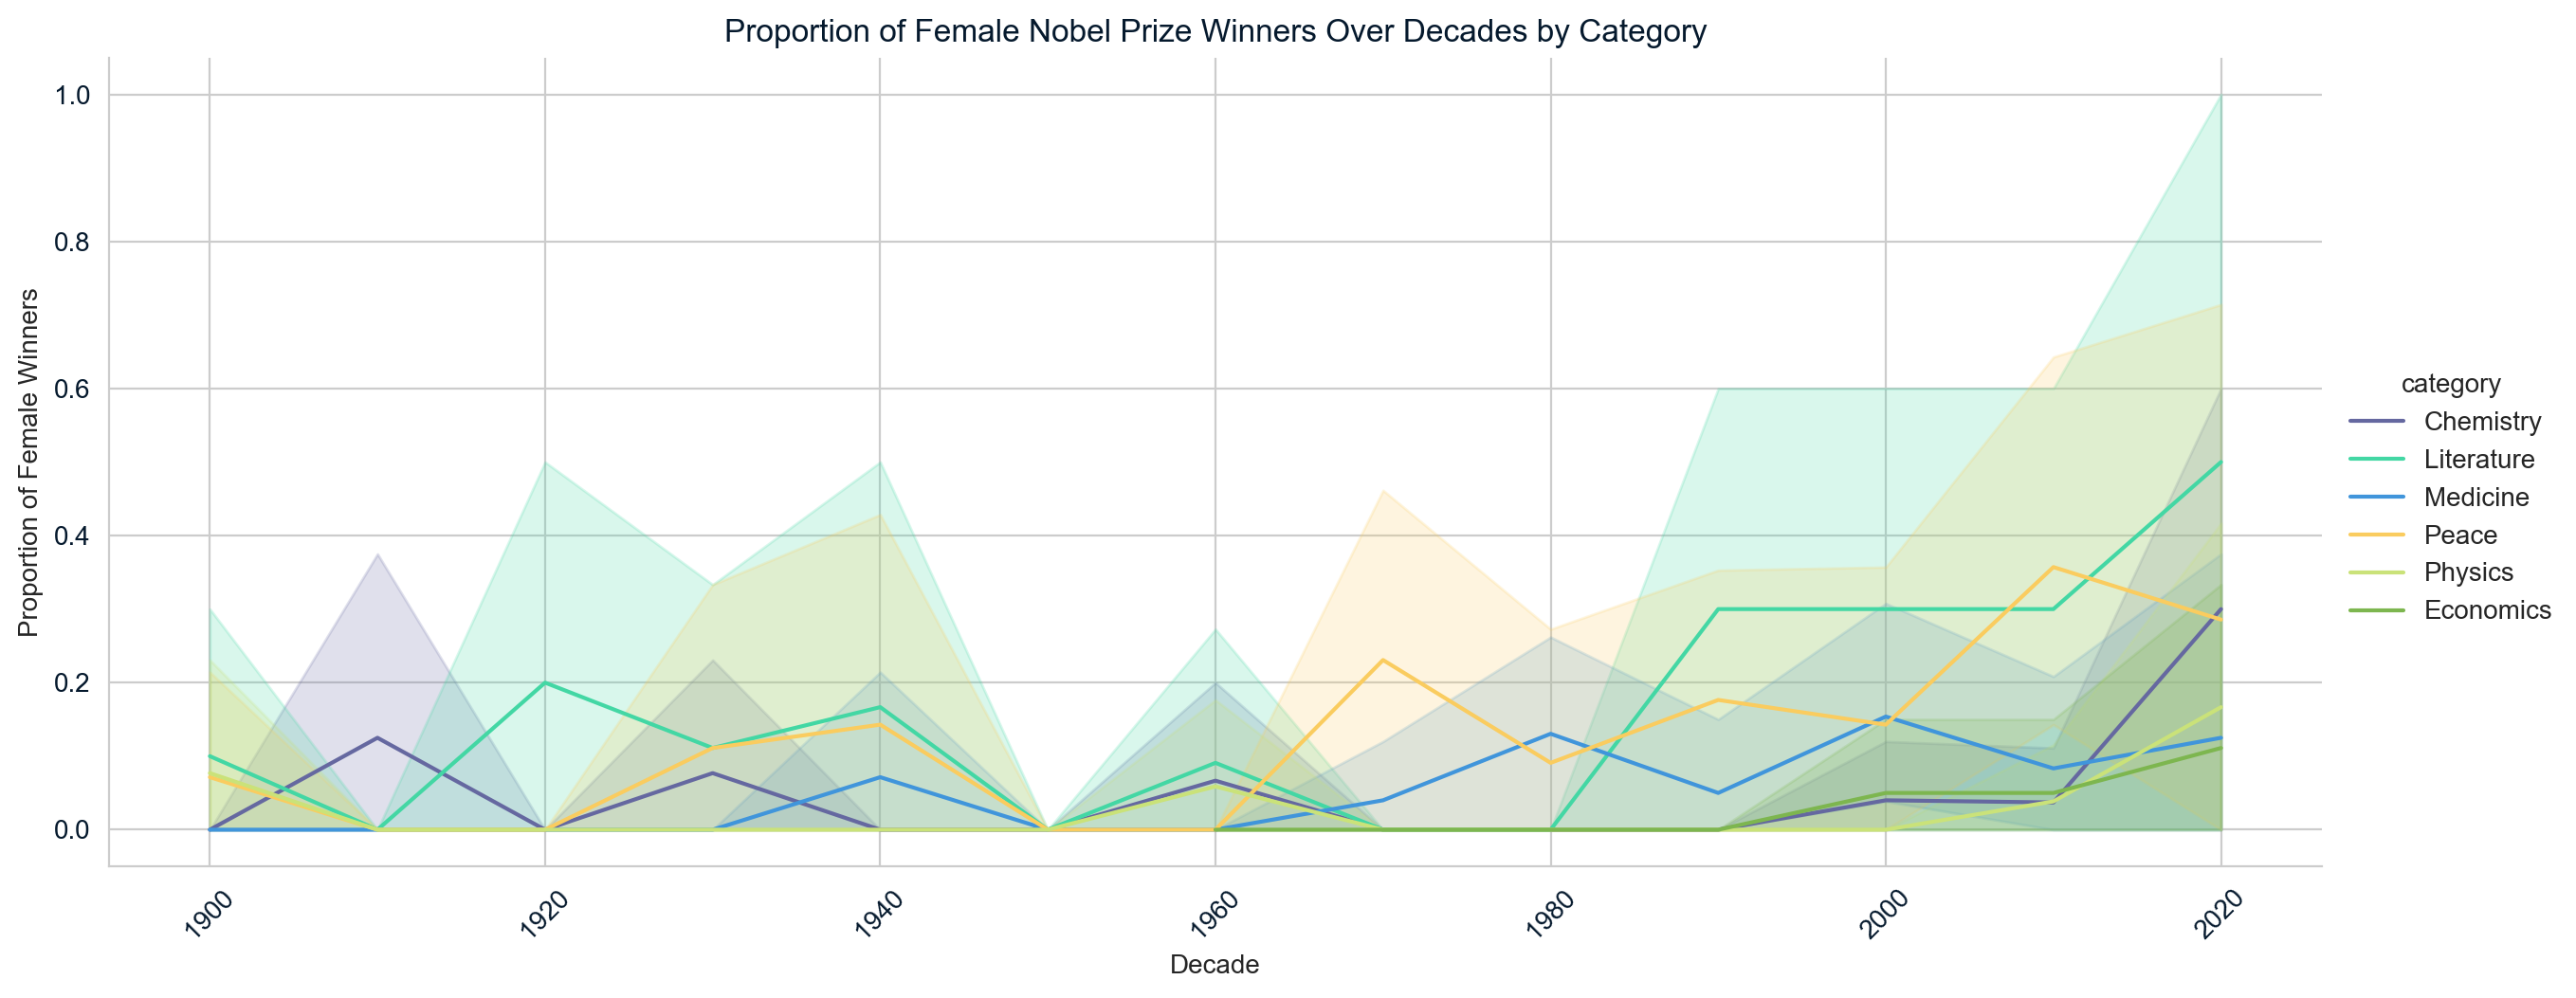

In [41]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create the relational line plot
sns.relplot(data=df, x="decade", y="female_winner", kind="line", hue="category", aspect=2.5)

# Set labels and title
plt.xlabel("Decade")
plt.ylabel("Proportion of Female Winners")
plt.title("Proportion of Female Nobel Prize Winners Over Decades by Category")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [42]:
# Sort by award_year and filter for female laureates
first_female_laureate = df[df["sex"] == "Female"].sort_values(by="year").iloc[0]
# Extract the name and category
first_woman_name = first_female_laureate["full_name"]
first_woman_category = first_female_laureate["category"]

print("First woman to receive a Nobel Prize:", first_woman_name)
print("Category:", first_woman_category)


First woman to receive a Nobel Prize: Marie Curie, née Sklodowska
Category: Physics


Individuals or organizations who have won more than one Nobel Prize throughout the years

In [43]:
# Count the number of prizes each individual or organization has won
prize_counts = df["full_name"].value_counts()

# Filter for individuals or organizations with more than one prize
repeat_winners = prize_counts[prize_counts > 1].index.tolist()

# Store the full names in a list
repeat_list = repeat_winners
print(repeat_list)


['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
